**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

**DATASET LOADING**

In [2]:
df=pd.read_csv('Iris.csv') #create a dataframe
df.head() #displays the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns=['Id']) #delete unnecessary columns
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe() #data statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info() #data type basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts() #displays number of samples of each class


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**DATASET PREPROCESSING**

In [7]:
df.isnull().sum() #check for null values

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


**EXPLORATORY DATA ANALYSIS**

<Axes: >

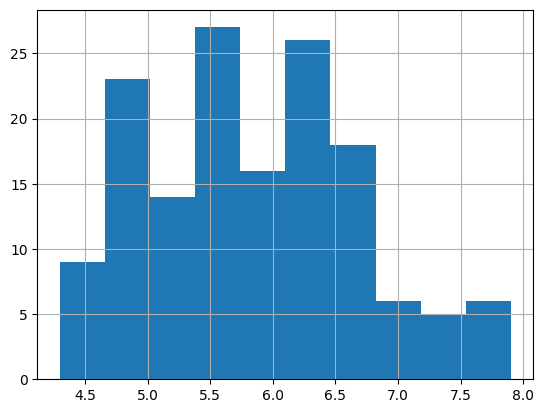

In [8]:
df['SepalLengthCm'].hist() #histograms

<Axes: >

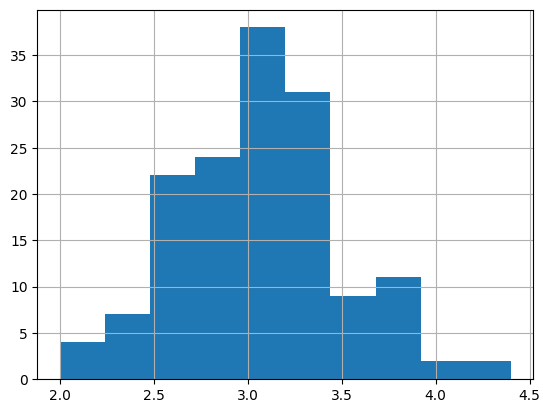

In [9]:
df['SepalWidthCm'].hist()

<Axes: >

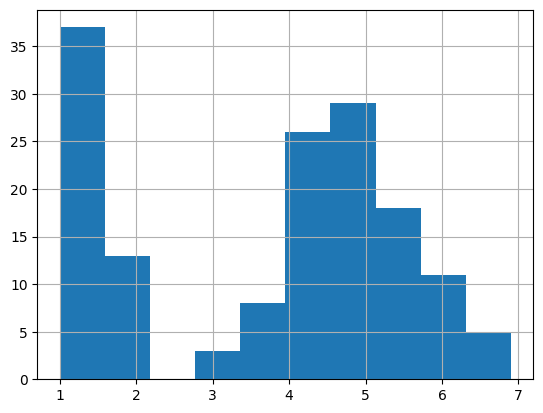

In [10]:
df['PetalLengthCm'].hist()

<Axes: >

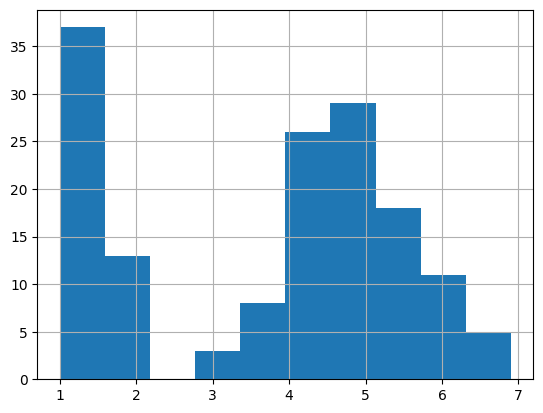

In [11]:
df['PetalLengthCm'].hist()

In [12]:
#scatterplot
colors=['red','blue','green']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']


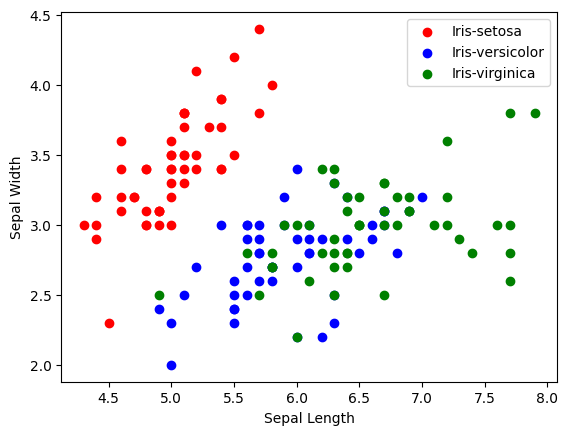

In [13]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

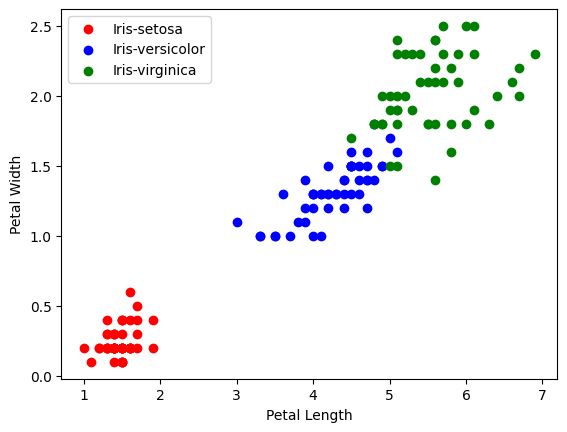

In [14]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

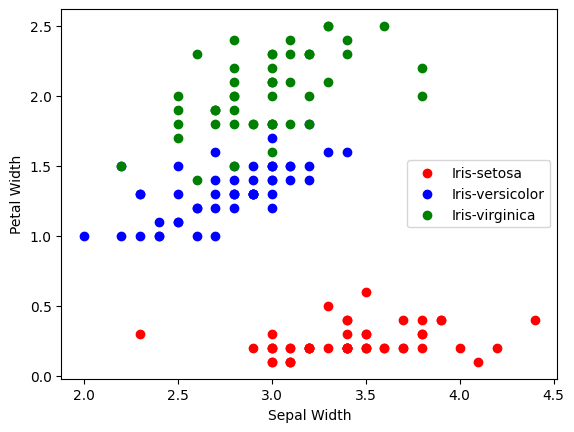

In [15]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

**CORRELATION MATRIX**

In [16]:
df_numerical=df.select_dtypes(include=['number'])
df_numerical.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

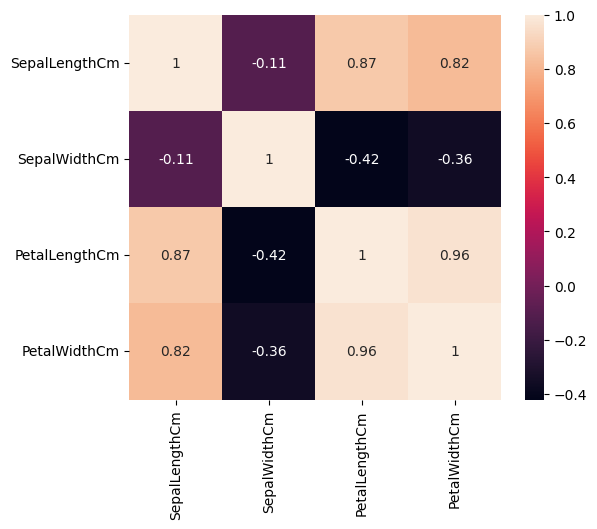

In [17]:
corr=df_numerical.corr()
fig,ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax)

**LABEL ENCODER**

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**MODEL TRAINING**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data=df.values
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
print(pred1)
print("Accuracy: ",accuracy_score(y_test,pred1)*100)
#or use this print("Accuracy: ",lr.score(x_test,y_test)*100)

[0 0 1 1 2 2 2 2 2 1 0 2 0 2 1 1 0 0 0 2 0 2 2 2 0 1 1 2 2 2 0 1 0 1 1 1 2
 2 0 1 1 2 2 1 1]
Accuracy:  93.33333333333333


In [21]:
#KNN or K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred2=knn.predict(x_test)
print(pred2)
print("Accuracy: ",accuracy_score(y_test,pred2)*100)
#or use this print("Accuracy: ",knn.score(x_test,y_test)*100)

[0 0 1 1 2 2 2 2 2 1 0 2 0 2 1 1 0 0 0 2 0 2 2 2 0 1 1 2 2 2 0 1 0 1 1 2 2
 2 0 1 1 2 2 1 1]
Accuracy:  95.55555555555556


In [22]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
pred3=nb.predict(x_test)
print(pred3)
print("Accuracy: ",accuracy_score(y_test,pred3)*100)
#or use this print("Accuracy: ",nb.score(x_test,y_test)*100)

[0 0 1 2 2 2 2 2 2 1 0 2 0 2 1 1 0 0 0 2 0 2 2 2 0 1 1 2 2 2 0 1 0 1 1 1 2
 2 0 1 1 1 2 1 1]
Accuracy:  88.88888888888889


In [23]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred4=dt.predict(x_test)
print(pred4)
print("Accuracy: ",accuracy_score(y_test,pred4)*100)
#print("Accuracy: ",dt.score(x_test,y_test)*100)

[0 0 1 1 2 2 2 2 2 1 0 2 0 2 1 1 0 0 0 2 0 2 2 2 0 1 1 1 2 2 0 1 0 1 1 1 2
 2 0 1 1 1 2 1 1]
Accuracy:  88.88888888888889


In [24]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred5=svm.predict(x_test)
print(pred5)
print("Accuracy: ",accuracy_score(y_test,pred5)*100)
#or use this print("Accuracy: ",svm.score(x_test,y_test)*100)

[0 0 1 1 2 2 2 2 2 1 0 2 0 2 1 1 0 0 0 1 0 2 2 2 0 1 1 2 2 2 0 1 0 1 1 1 2
 1 0 1 1 2 2 1 1]
Accuracy:  93.33333333333333


In [25]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1))
print(classification_report(y_test,pred2))
print(classification_report(y_test,pred3))
print(classification_report(y_test,pred4))
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.86      0.83        14
           2       0.89      0.84      0.86        19

    accuracy        

In [26]:
X_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction=dt.predict(X_new)
print("Prediction of Species: {}".format(prediction))


Prediction of Species: [0 1 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
